In [1]:
######## 3D PCA BCL2 Paper

# load/import modules
import IPython
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
%matplotlib
import matplotlib.pyplot as plt

Using matplotlib backend: <object object at 0x78ae6b1ad620>


In [2]:
# initialize 3d coordinates
df=pd.DataFrame({'X': (-18.639632, 10.601685, 2.818662, -7.850749, -12.738279, 18.955236, 8.358206, -2.985486,
                       -17.181493, 10.029921, 3.608490, -9.396237, -13.049738, 19.368460, 8.160050, -3.781980,
                       -17.271806, 11.269457, 2.688651, -9.136425, -7.918788,  18.905950, 7.883859, -2.698014),
                 'Y': (-4.4557218, -11.5558928, -7.3860448, -5.7587308, 4.6564438, 1.1818664, 3.6290338, 5.5609070,
                       -2.9775406, -9.5994304,  -6.5943711, -4.3873373, 3.4226392, 0.6324845, 1.8250731, 4.7383334,
                       -2.6657867, -10.2310965, -6.0619726, -4.6145824, 13.2287934, 9.6625211, 13.3934041, 14.3570081),
                 'Z': (2.1635716, 5.9546213, -7.9841394, -0.5021688, 3.6929016, 4.8628961, -7.5451442, 0.1089698,
                       1.4824371, 5.0115435, -8.6657187, -0.5945799, 2.1548742, 4.1922174, -8.0475042, 0.1522079,
                       1.4168317, 5.8260923, -7.1988622, -0.2053890 , 3.1708206, 4.0876298, -5.4190024, 1.8848940),
                 'Species':("E_nt", "E_doxo", "E_actd", "E_cx", "BCL2_nt", "BCL2_doxo", "BCL2_actd", "BCL2_cx", "E_nt",
                            "E_doxo", "E_actd", "E_cx", "BCL2_nt", "BCL2_doxo", "BCL2_actd", "BCL2_cx",
                            "E_nt", "E_doxo", "E_actd", "E_cx", "BCL2_nt", "BCL2_doxo", "BCL2_actd", "BCL2_cx"),
                 'Sample': ("S31137", "S31138", "S31139", "S31140", "S31141", "S31142", "S31143", "S31144", "S31145",
                            "S31146", "S31147", "S31148", "S31149", "S31150", "S31151", "S31152", "S31153", "S31154",
                            "S31155", "S31156", "S31157", "S31158", "S31159", "S31160")})

print(df)

df


            X          Y         Z    Species  Sample
0  -18.639632  -4.455722  2.163572       E_nt  S31137
1   10.601685 -11.555893  5.954621     E_doxo  S31138
2    2.818662  -7.386045 -7.984139     E_actd  S31139
3   -7.850749  -5.758731 -0.502169       E_cx  S31140
4  -12.738279   4.656444  3.692902    BCL2_nt  S31141
5   18.955236   1.181866  4.862896  BCL2_doxo  S31142
6    8.358206   3.629034 -7.545144  BCL2_actd  S31143
7   -2.985486   5.560907  0.108970    BCL2_cx  S31144
8  -17.181493  -2.977541  1.482437       E_nt  S31145
9   10.029921  -9.599430  5.011544     E_doxo  S31146
10   3.608490  -6.594371 -8.665719     E_actd  S31147
11  -9.396237  -4.387337 -0.594580       E_cx  S31148
12 -13.049738   3.422639  2.154874    BCL2_nt  S31149
13  19.368460   0.632485  4.192217  BCL2_doxo  S31150
14   8.160050   1.825073 -8.047504  BCL2_actd  S31151
15  -3.781980   4.738333  0.152208    BCL2_cx  S31152
16 -17.271806  -2.665787  1.416832       E_nt  S31153
17  11.269457 -10.231096  5.

,X,Y,Z,Species,Sample
0,-18.639632,-4.455722,2.163572,E_nt,S31137
1,10.601685,-11.555893,5.954621,E_doxo,S31138
2,2.818662,-7.386045,-7.984139,E_actd,S31139
3,-7.850749,-5.758731,-0.502169,E_cx,S31140
4,-12.738279,4.656444,3.692902,BCL2_nt,S31141
5,18.955236,1.181866,4.862896,BCL2_doxo,S31142
6,8.358206,3.629034,-7.545144,BCL2_actd,S31143
7,-2.985486,5.560907,0.108970,BCL2_cx,S31144
8,-17.181493,-2.977541,1.482437,E_nt,S31145
9,10.029921,-9.599430,5.011544,E_doxo,S31146


In [3]:
df['Species']=pd.Categorical(df['Species'])

# insert the column color in the dataframe
#manual_palette_hex=['#7D26CD','#f82aff','#ff912a','#b03060','#7D26CD','#f82aff','#ff912a','#b03060']
manual_palette_hex=['#EBFFE6','#BBE40A','#76CDCD','#5BB450',
                    '#F5E1FD', '#440154', '#414487', '#2A788E',
                    '#EBFFE6','#BBE40A','#76CDCD','#5BB450',
                     '#F5E1FD', '#440154', '#414487', '#2A788E',
                    '#EBFFE6','#BBE40A','#76CDCD','#5BB450',
                    '#F5E1FD', '#440154' ,'#414487', '#2A788E']

#manual_palette_hex=['#EBFFE6','#BBE40A','#76CDCD','#5BB450',
#                    '#F5E1FD', '#440154', '#414487', 'black',
#                    '#EBFFE6','#BBE40A','#76CDCD','#5BB450',
#                     '#F5E1FD', '#440154', '#414487', 'black',
#                    '#EBFFE6','#BBE40A','#76CDCD','#5BB450',
#                    '#F5E1FD', '#440154' ,'#414487', 'black',]




df['color']=manual_palette_hex
df

,X,Y,Z,Species,Sample,color
0,-18.639632,-4.455722,2.163572,E_nt,S31137,#EBFFE6
1,10.601685,-11.555893,5.954621,E_doxo,S31138,#BBE40A
2,2.818662,-7.386045,-7.984139,E_actd,S31139,#76CDCD
3,-7.850749,-5.758731,-0.502169,E_cx,S31140,#5BB450
4,-12.738279,4.656444,3.692902,BCL2_nt,S31141,#F5E1FD
5,18.955236,1.181866,4.862896,BCL2_doxo,S31142,#440154
6,8.358206,3.629034,-7.545144,BCL2_actd,S31143,#414487
7,-2.985486,5.560907,0.108970,BCL2_cx,S31144,#2A788E
8,-17.181493,-2.977541,1.482437,E_nt,S31145,#EBFFE6
9,10.029921,-9.599430,5.011544,E_doxo,S31146,#BBE40A


In [4]:
df1=df[['X','Y','Z','Sample','color']]
df1

,X,Y,Z,Sample,color
0,-18.639632,-4.455722,2.163572,S31137,#EBFFE6
1,10.601685,-11.555893,5.954621,S31138,#BBE40A
2,2.818662,-7.386045,-7.984139,S31139,#76CDCD
3,-7.850749,-5.758731,-0.502169,S31140,#5BB450
4,-12.738279,4.656444,3.692902,S31141,#F5E1FD
5,18.955236,1.181866,4.862896,S31142,#440154
6,8.358206,3.629034,-7.545144,S31143,#414487
7,-2.985486,5.560907,0.108970,S31144,#2A788E
8,-17.181493,-2.977541,1.482437,S31145,#EBFFE6
9,10.029921,-9.599430,5.011544,S31146,#BBE40A


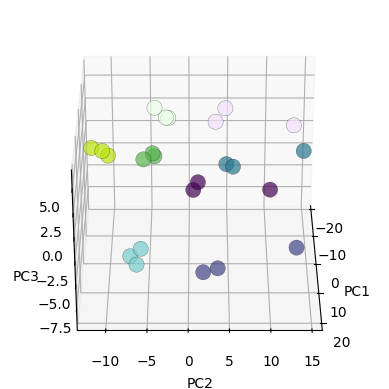

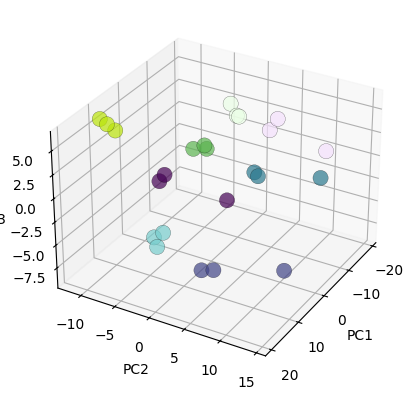

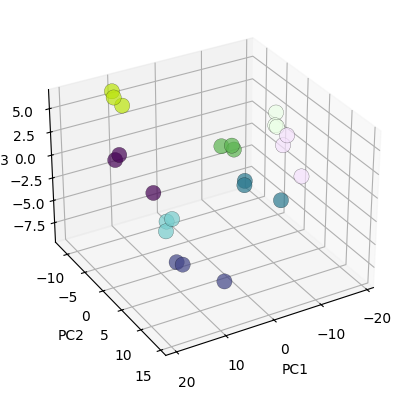

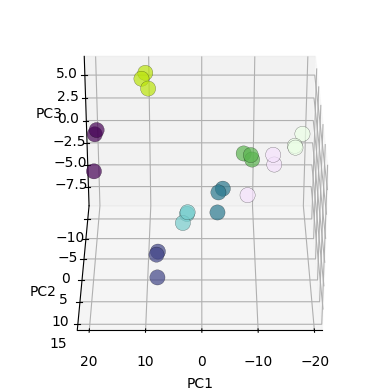

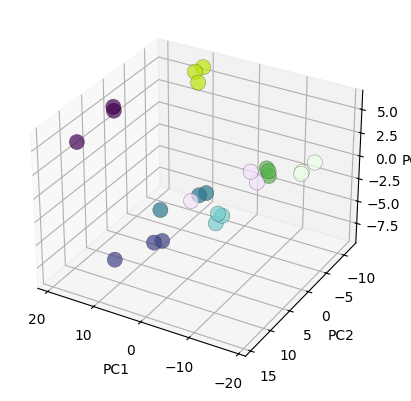

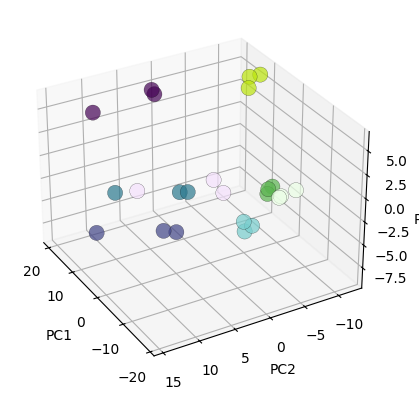

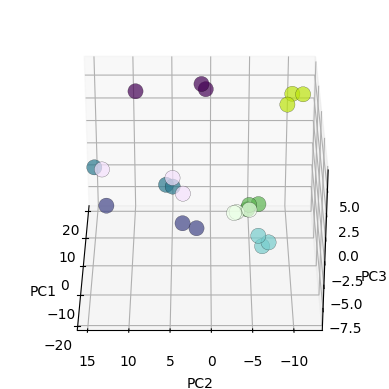

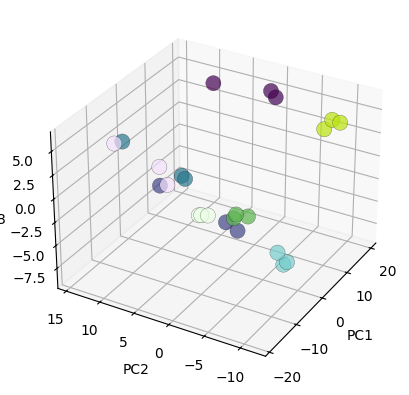

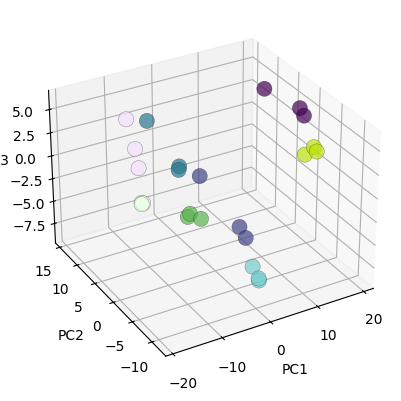

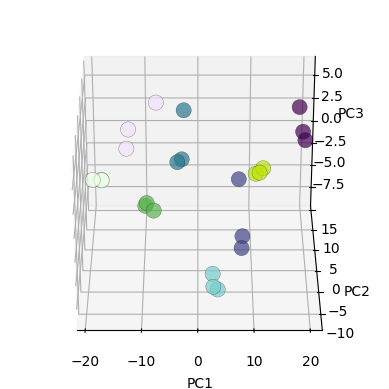

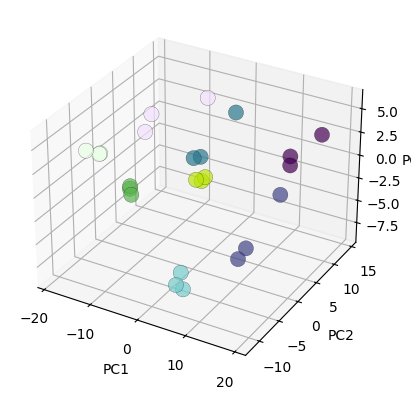

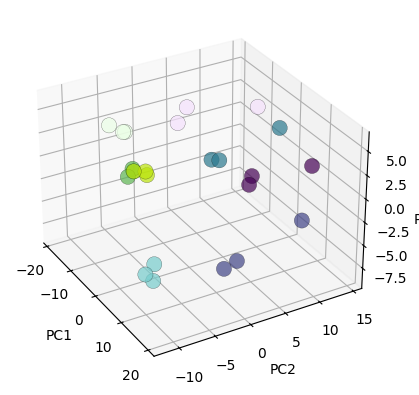

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


# https://python-graph-gallery.com/342-animation-on-3d-plot/
# We are going to do 20 plots, for 20 different angles
for angle in range(0,360,30):
 # Make the plot
 fig = plt.figure()
 ax = fig.add_subplot(111, projection='3d')
 ax.scatter(df['X'], df['Y'], df['Z'],s=120,alpha=0.7, c=df['color'],edgecolors='black',linewidths=0.2,depthshade=500)
    # label the axes
 ax.set_xlabel("PC1")
 ax.set_ylabel("PC2")
 ax.set_zlabel("PC3")
 # Set the angle of the camera
 ax.view_init(30,angle)

    # Save it
 filename='PCA_Empty_vs_BCL2_angle'+str(angle)+'.pdf'
 plt.savefig(filename, dpi=96)
 plt.show()



